## План решения

++ 1.Загрузить данные провести минимальную обработку

++ 2.Построить базовые модели.Получить первые результаты, посмотреть какая лучше подходит

++ 3.Поиграть с параметрами модели

++ 4.Найти новы зависимости: выделить кластеры, главные компоненты, попробовать обучить раздельно

5.Попробовать обработать выбросы, кривые данные

    5.1 Посмотреть тетрадку Ирины

6.Попробовать нагенерить новых фичей (Log, средние и прочее)

    6.1 Цена за квадрат

7.Посмотреть лекцию и тюнинг ГБ

8.Посмотреть как решают задачи предсказание цен на недвижку

9.Что еще? Хочу 0.8+

10.Оформить, упаковать, сдать

## 1.Загрузить данные провести минимальную обработку

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-ticks')
sns.style = "seaborn-ticks"
#%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

### Общие функции

In [3]:
def draw_boxplot_graphics(df:pd.core.frame.DataFrame, columns:list):
    'Рисует графики BoxPlots для переденных колонок'   
    for col in columns:
        plt.figure(figsize=(14, 1))
        sns.boxplot(data=df[col].values, orient='h', palette='Set2')
        plt.xlabel(col,fontdict={'fontsize':14})   
        
    plt.show()

In [120]:
df_train = pd.read_csv(DATASET_PATH, index_col='Id')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [121]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.000,50.401,43.588,0.000,20.000,36.000,75.000,209.000
Rooms,10000.000,1.891,0.840,0.000,1.000,2.000,2.000,19.000
Square,10000.000,56.316,21.059,1.137,41.775,52.513,65.901,641.065
LifeSquare,7887.000,37.200,86.241,0.371,22.770,32.781,45.129,7480.592
KitchenSquare,10000.000,6.273,28.561,0.000,1.000,6.000,9.000,2014.000
Floor,10000.000,8.527,5.241,1.000,4.000,7.000,12.000,42.000
HouseFloor,10000.000,12.609,6.776,0.000,9.000,13.000,17.000,117.000
HouseYear,10000.000,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,20052011.000
Ecology_1,10000.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Social_1,10000.000,24.687,17.533,0.000,6.000,25.000,36.000,74.000


In [122]:
#уберем самые "страшные" выбросы, на Boxplot ниже, проверим, их отсутствие
df_train.drop(df_train[df_train['LifeSquare'] > 600].index, inplace=True)
df_train.drop(df_train[df_train['KitchenSquare'] > 600].index, inplace=True)
df_train.drop(df_train[df_train['HouseYear'] > 2020].index, inplace=True)

df_train.shape

(9994, 19)

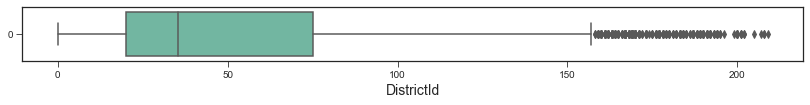

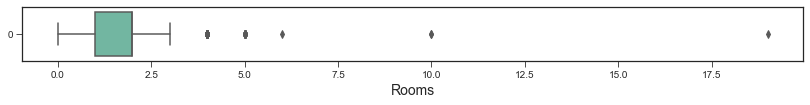

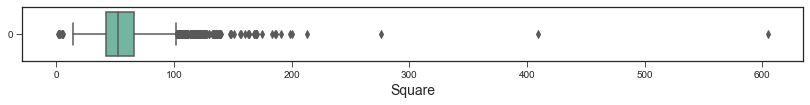

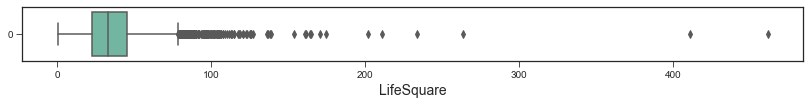

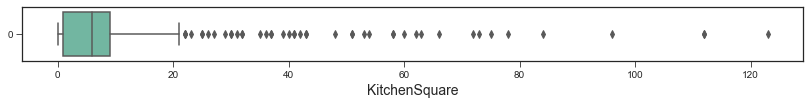

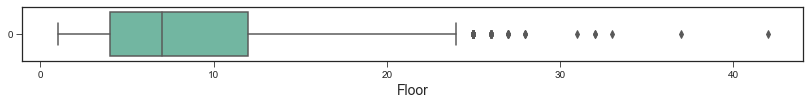

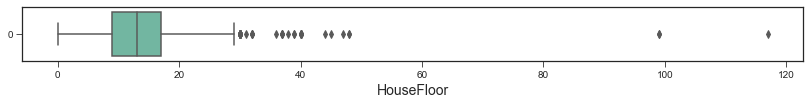

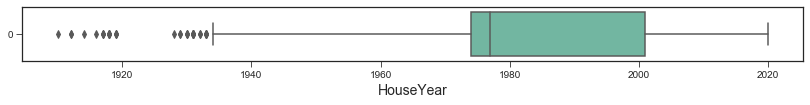

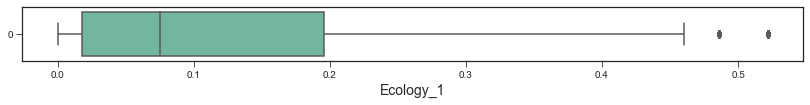

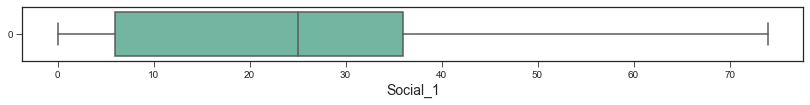

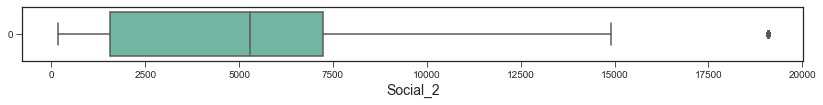

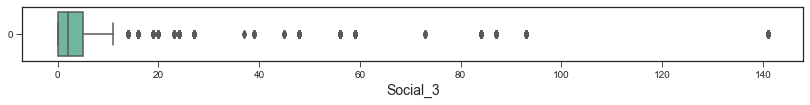

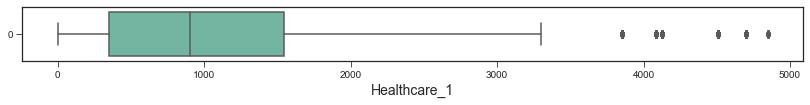

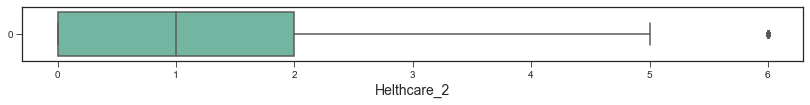

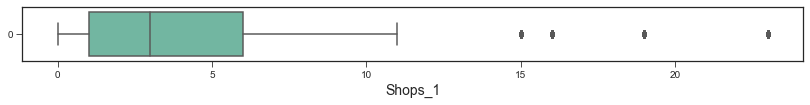

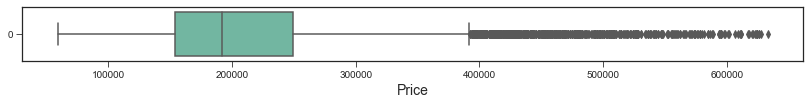

In [123]:
features_list = df_train.select_dtypes(exclude='object').columns.tolist()
draw_boxplot_graphics(df_train, features_list)

In [124]:
# Заполняем пропуски LifeSquare медианой
df_train['LifeSquare'].fillna(value=df_train['LifeSquare'].median(), inplace=True)

In [125]:
#Ecology_2, Ecology_3, Shops_2
print(df_train['Ecology_2'].value_counts())
print(df_train['Ecology_3'].value_counts())
print(df_train['Shops_2'].value_counts())

B    9897
A      97
Name: Ecology_2, dtype: int64
B    9719
A     275
Name: Ecology_3, dtype: int64
B    9170
A     824
Name: Shops_2, dtype: int64


In [126]:
df_dummies = pd.get_dummies(df_train, columns=['Ecology_2', 'Ecology_3', 'Shops_2'])
df_dummies.drop(axis=1,columns=['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], inplace=True)
df_train[['Ecology_2', 'Ecology_3', 'Shops_2']] = df_dummies[['Ecology_2_A', 'Ecology_3_A', 'Shops_2_A']]

print(df_train['Ecology_2'].value_counts())
print(df_train['Ecology_3'].value_counts())
print(df_train['Shops_2'].value_counts())

0    9897
1      97
Name: Ecology_2, dtype: int64
0    9719
1     275
Name: Ecology_3, dtype: int64
0    9170
1     824
Name: Shops_2, dtype: int64


In [127]:
#Удалим. Как заполнять пропуски не знаю. Но оставим признак, было заполнено или нет
def fill_healthcare_1(x):
    if pd.notna(x):
        return 1
    else:
        return 0

df_train['Healthcare_1_filled'] = df_train['Healthcare_1'].apply(fill_healthcare_1)
df_train.drop('Healthcare_1', axis=1, inplace=True)
print(df_train['Healthcare_1_filled'].value_counts())

1    5198
0    4796
Name: Healthcare_1_filled, dtype: int64


#### Итоги базовой чистки

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistrictId           9994 non-null   int64  
 1   Rooms                9994 non-null   float64
 2   Square               9994 non-null   float64
 3   LifeSquare           9994 non-null   float64
 4   KitchenSquare        9994 non-null   float64
 5   Floor                9994 non-null   int64  
 6   HouseFloor           9994 non-null   float64
 7   HouseYear            9994 non-null   int64  
 8   Ecology_1            9994 non-null   float64
 9   Ecology_2            9994 non-null   uint8  
 10  Ecology_3            9994 non-null   uint8  
 11  Social_1             9994 non-null   int64  
 12  Social_2             9994 non-null   int64  
 13  Social_3             9994 non-null   int64  
 14  Helthcare_2          9994 non-null   int64  
 15  Shops_1              9994 non-null

### Дополнительная чистка выбросов

In [129]:
df_train.drop(df_train[df_train['Rooms'] > 7].index, inplace=True)
df_train.drop(df_train[df_train['Square'] > 250].index, inplace=True)
df_train.drop(df_train[df_train['LifeSquare'] > 200].index, inplace=True)
df_train.drop(df_train[df_train['KitchenSquare'] > 50].index, inplace=True)
df_train.drop(df_train[df_train['Floor'] > 30].index, inplace=True)
df_train.drop(df_train[df_train['HouseFloor'] > 60].index, inplace=True)
df_train.drop(df_train[df_train['HouseYear'] < 1920].index, inplace=True)

In [130]:
df_train.shape, f'Удалено: {round((1 - df_train.shape[0] / 10000) * 100,2)}%'

((9940, 19), 'Удалено: 0.6%')

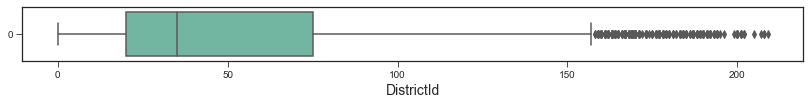

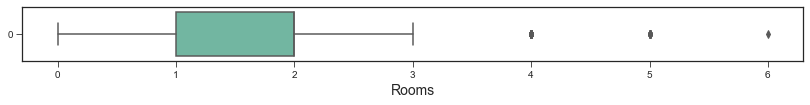

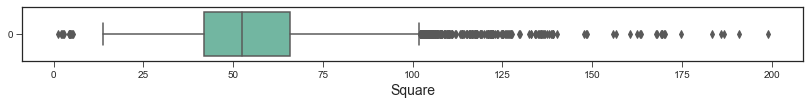

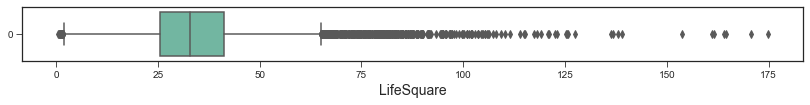

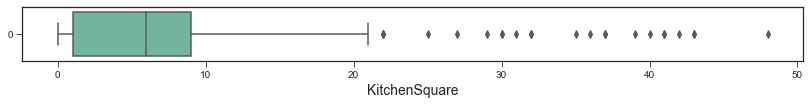

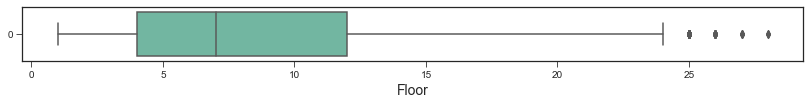

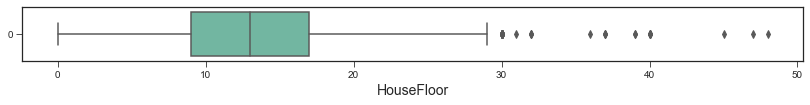

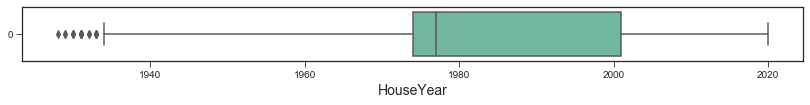

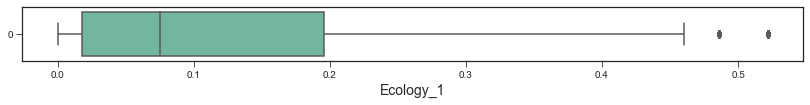

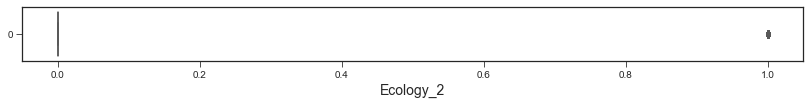

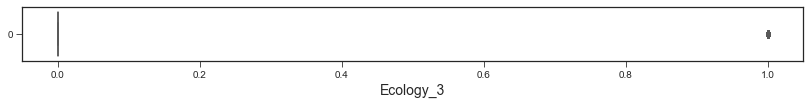

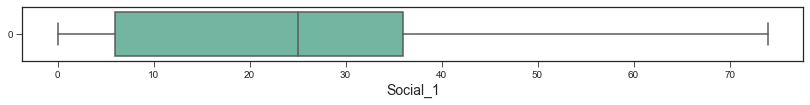

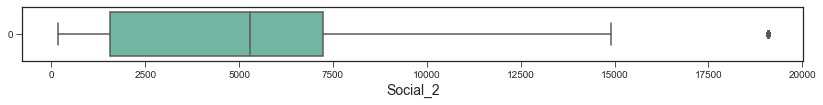

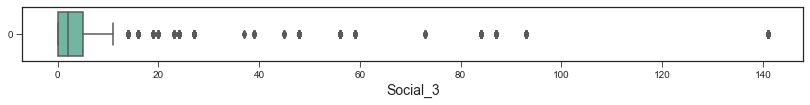

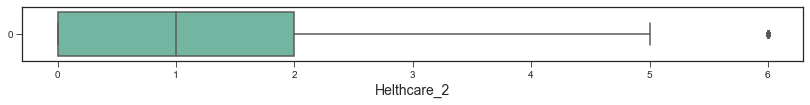

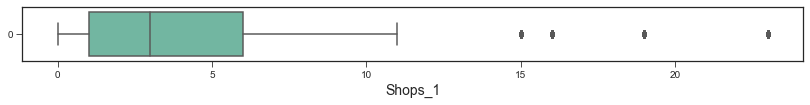

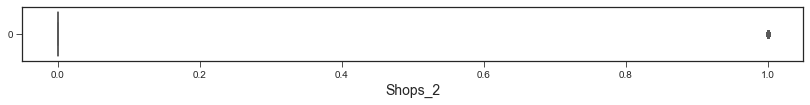

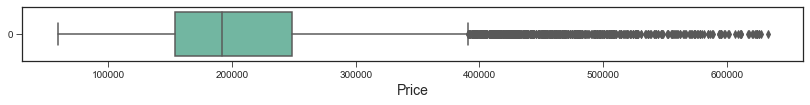

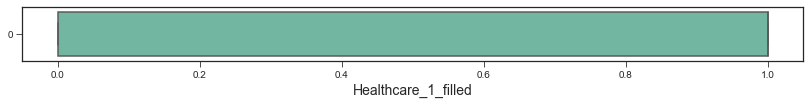

In [131]:
features_list = df_train.select_dtypes(exclude='object').columns.tolist()
draw_boxplot_graphics(df_train, features_list)

### Логарифмируем некоторые признаки

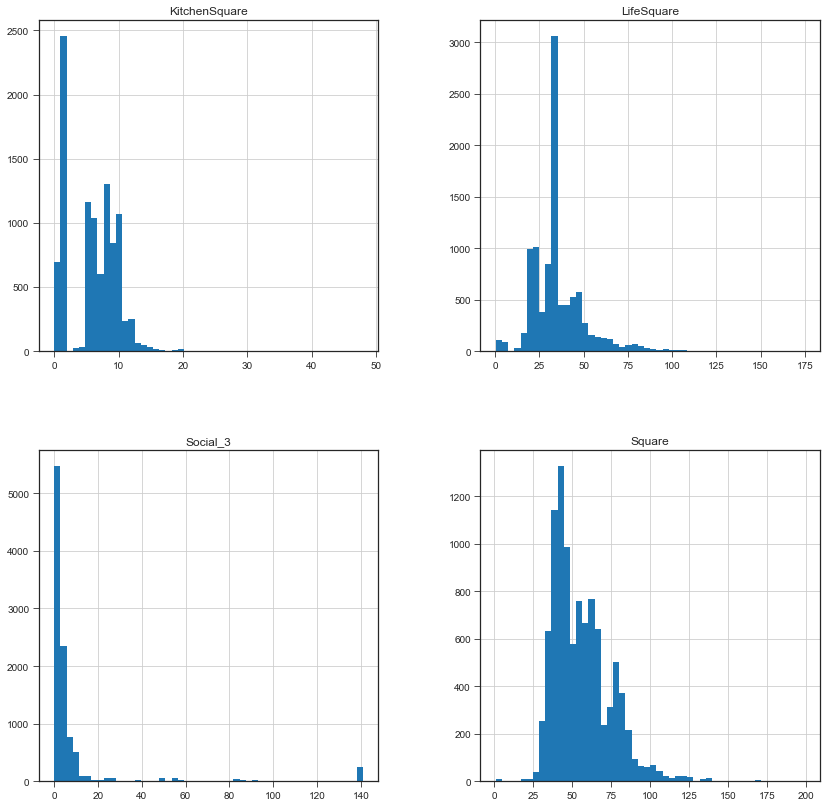

In [133]:
feature_num_names = ['Square', 'LifeSquare', 'KitchenSquare', 'Social_3']

df_train[feature_num_names].hist(figsize=(14,14), bins=50, grid=True);

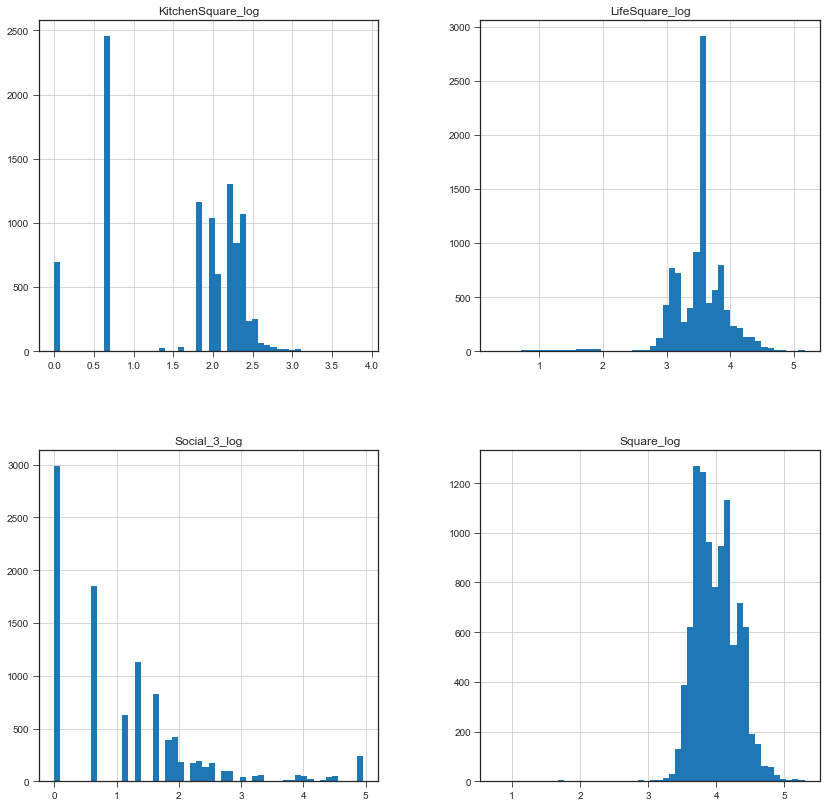

In [137]:
feature_log_names = []
for f in feature_num_names:
    df_train[f + '_log'] = np.log(df_train[f]+1)
    feature_log_names.append(f + '_log')
    
df_train[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

### Готовим датасеты

In [161]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

X.shape, y.shape

((9940, 22), (9940,))

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7455, 22), (2485, 22), (7455,), (2485,))

### Масштабируем признаки

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,7455.000,0.000,1.000,-1.153,-0.740,-0.326,0.569,3.646
Rooms,7455.000,-0.000,1.000,-2.318,-1.088,0.142,0.142,5.062
Square,7455.000,0.000,1.000,-2.933,-0.762,-0.179,0.524,7.208
LifeSquare,7455.000,-0.000,1.000,-2.216,-0.646,-0.156,0.385,8.949
KitchenSquare,7455.000,0.000,1.000,-1.403,-1.160,0.055,0.784,10.260
Floor,7455.000,0.000,1.000,-1.447,-0.871,-0.296,0.664,3.735
HouseFloor,7455.000,0.000,1.000,-1.946,-0.560,0.210,0.672,5.292
HouseYear,7455.000,-0.000,1.000,-3.085,-0.608,-0.443,0.878,1.924
Ecology_1,7455.000,-0.000,1.000,-1.002,-0.855,-0.372,0.625,3.334
Ecology_2,7455.000,0.000,1.000,-0.103,-0.103,-0.103,-0.103,9.725


## 2.Построить базовые модели
Получить первые результаты, посмотреть какая лучше подходит

In [164]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [165]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

### Градиентный бустинг (без подбора)

In [177]:
X_train = X_train_scaled
X_test = X_test_scaled

In [178]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [179]:
y_train_preds = gbr.predict(X_train)
y_test_preds = gbr.predict(X_test)

Train:	R2 = 0.905	MAE = 18661.802
Test:	R2 = 0.755	MAE = 27526.059


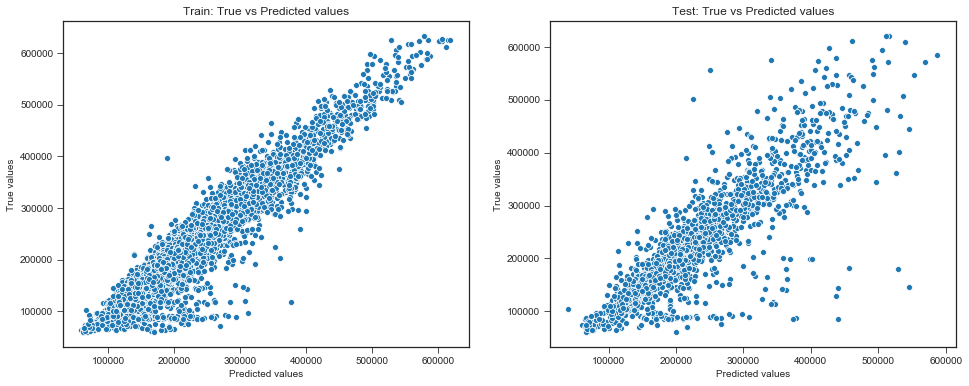

In [175]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [176]:
feature_importances = pd.DataFrame(zip(X_train.columns, gbr.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
2,Square,0.240
18,Square_log,0.167
11,Social_1,0.118
12,Social_2,0.072
1,Rooms,0.069
0,DistrictId,0.059
21,Social_3_log,0.046
8,Ecology_1,0.046
13,Social_3,0.040
7,HouseYear,0.036


### Градиентный бустинг (подбор параметров)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7995, 18), (1999, 18), (7995,), (1999,))

In [169]:
gb_model = GradientBoostingRegressor(random_state=42)
params = {'n_estimators':[i for i in range(100, 600, 100)], 
          'max_depth':[i for i in range(5, 17, 2)],
          'learning_rate': [0.1, 0.25, 0.5, 0.75]}

gs = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=KFold(n_splits=3, random_state=42, shuffle=True), 
                  n_jobs=-1)

In [170]:
#Включаем по необходимости. Долго считает
gs.fit(X_train_scaled, y_train)  

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weigh...
                                                 n_iter_no_change=None,
                                         

In [171]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [172]:
gs.best_score_

0.7343503695601531

### Случайный лес

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7455, 22), (2485, 22), (7455,), (2485,))

In [154]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Train:	R2 = 0.962	MAE = 10521.67
Test:	R2 = 0.747	MAE = 28530.353


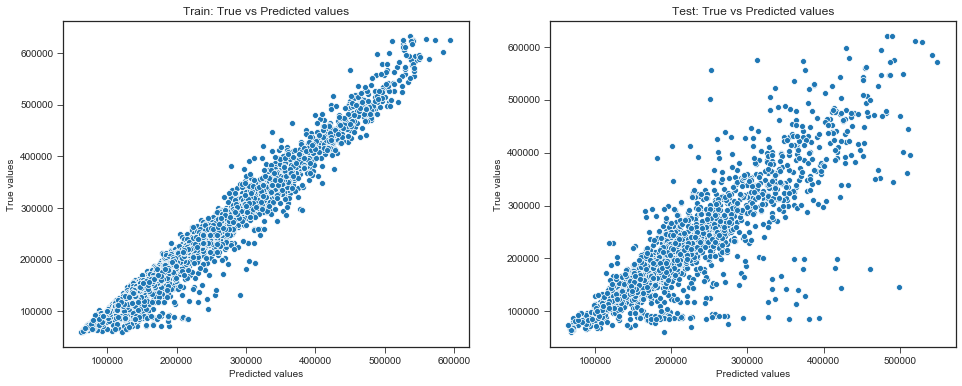

In [155]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

### Градиентный бустниг XGB

In [156]:
from xgboost import XGBRegressor

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7952, 22), (1988, 22), (7952,), (1988,))

In [166]:
model = XGBRegressor(
    max_depth=5,
    n_estimators=200,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,
    learning_rate=0.1,    
    seed=42)

In [167]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-rmse:211410.25000	validation_1-rmse:211163.03125
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:192166.92188	validation_1-rmse:191972.54688
[2]	validation_0-rmse:174954.26562	validation_1-rmse:174829.17188
[3]	validation_0-rmse:159742.35938	validation_1-rmse:159605.64062
[4]	validation_0-rmse:146109.39062	validation_1-rmse:145928.15625
[5]	validation_0-rmse:134184.62500	validation_1-rmse:134118.93750
[6]	validation_0-rmse:123474.51562	validation_1-rmse:123422.87500
[7]	validation_0-rmse:114054.17188	validation_1-rmse:114043.25000
[8]	validation_0-rmse:105690.60938	validation_1-rmse:105699.63281
[9]	validation_0-rmse:98518.32031	validation_1-rmse:98567.18750
[10]	validation_0-rmse:92152.65625	validation_1-rmse:92322.38281
[11]	validation_0-rmse:86554.50000	validation_1-rmse:86792.60156
[12]	validation_0-rmse:81656.10938	validation_1-rmse:

[124]	validation_0-rmse:46766.78906	validation_1-rmse:49054.90234
[125]	validation_0-rmse:46747.25391	validation_1-rmse:49044.72266
[126]	validation_0-rmse:46726.39844	validation_1-rmse:49016.71875
[127]	validation_0-rmse:46668.36719	validation_1-rmse:48991.91797
[128]	validation_0-rmse:46623.62500	validation_1-rmse:48984.66406
[129]	validation_0-rmse:46585.92578	validation_1-rmse:48954.81250
[130]	validation_0-rmse:46543.30859	validation_1-rmse:48922.93359
[131]	validation_0-rmse:46514.90234	validation_1-rmse:48878.47656
[132]	validation_0-rmse:46454.07812	validation_1-rmse:48874.96484
[133]	validation_0-rmse:46417.73438	validation_1-rmse:48843.06641
[134]	validation_0-rmse:46378.34375	validation_1-rmse:48831.94141
[135]	validation_0-rmse:46355.14453	validation_1-rmse:48827.35156
[136]	validation_0-rmse:46333.85156	validation_1-rmse:48804.46094
[137]	validation_0-rmse:46322.78125	validation_1-rmse:48788.10156
[138]	validation_0-rmse:46292.39844	validation_1-rmse:48773.00391
[139]	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

Train:	R2 = -0.258	MAE = 82146.944
Test:	R2 = -0.257	MAE = 84873.462


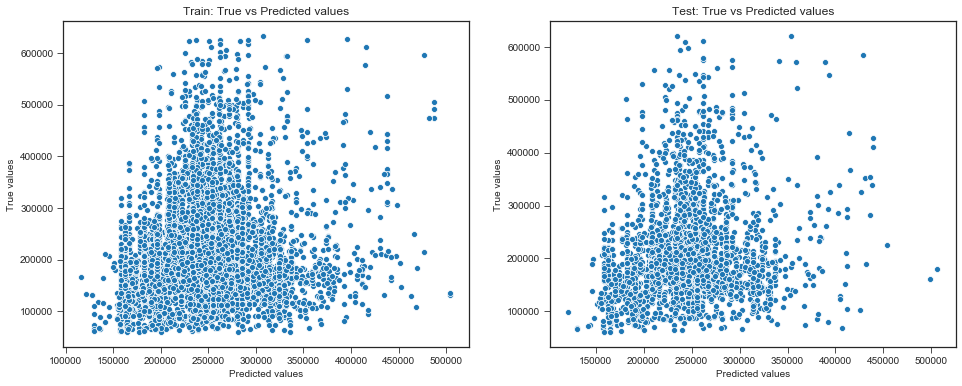

In [168]:
y_train_preds = gbr.predict(X_train)
y_test_preds = gbr.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

## 4.Пробуем выделить кластеры, найти новые зависимости

In [17]:
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
   
    return None


def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    
    return None


def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3']) 


def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);
    
    
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)
    
    if labels is not None:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(12,6), sharex=False)
    else:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                       alpha=0.5, figsize=(12,6))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects'); 

### Выделяем главные компоненты

In [19]:
components_2d_pca = reduce_dims_to_2D_space_with_PCA(X_train_scaled)
components_2d_tsne = reduce_dims_to_2D_space_with_TSNE(X_train_scaled)

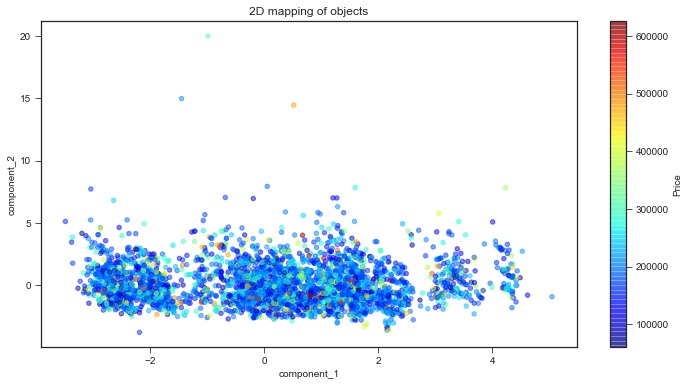

In [22]:
display_components_in_2D_space(components_2d_pca, y_train)

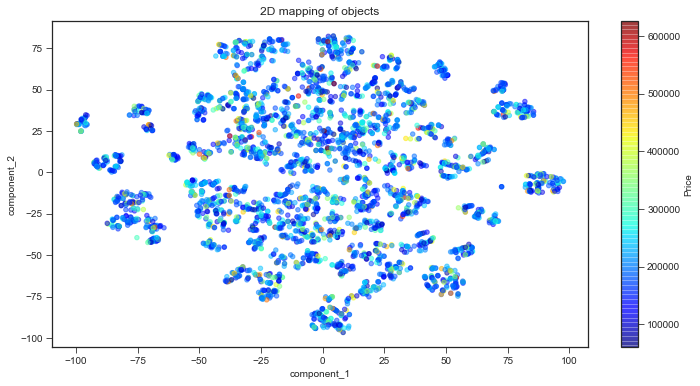

In [23]:
display_components_in_2D_space(components_2d_tsne, y_train)

In [24]:
components_3d_pca = reduce_dims_to_3D_space_with_PCA(X_train_scaled)
components_3d_tsne = reduce_dims_to_3D_space_with_TSNE(X_train_scaled)

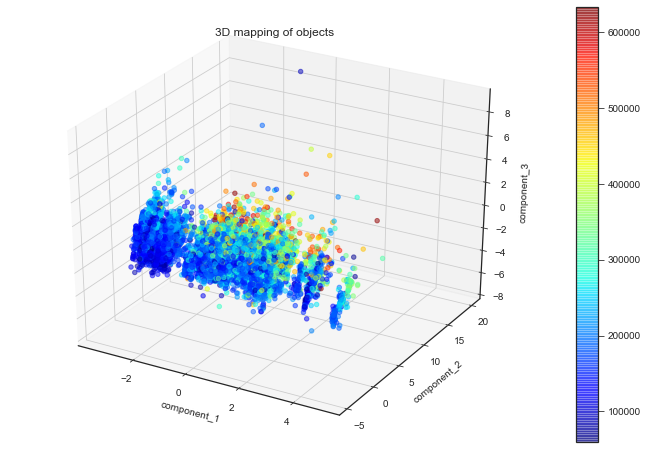

In [25]:
display_components_in_3D_space(components_3d_pca, y_train)

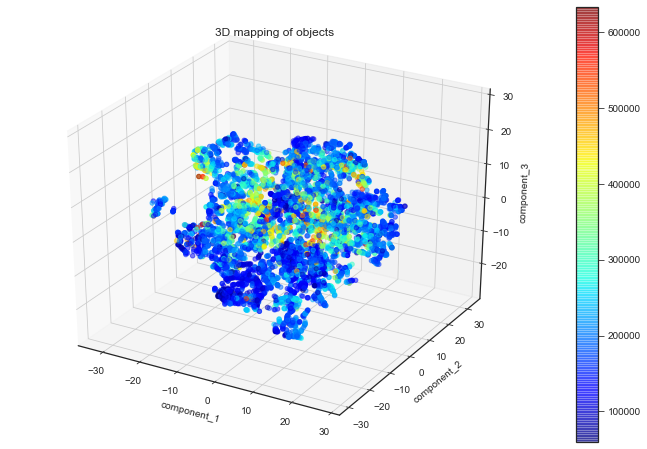

In [26]:
display_components_in_3D_space(components_3d_tsne, y_train)

In [27]:
pca = PCA(n_components=3)
components_3d_pca_train = pca.fit_transform(X_train_scaled)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            X_train_scaled.columns)), '\n')

1 component: 18.43% of initial variance
0.235 x DistrictId + 0.045 x Rooms + -0.053 x Square + -0.054 x LifeSquare + 0.150 x KitchenSquare + -0.074 x Floor + -0.057 x HouseFloor + -0.101 x HouseYear + 0.040 x Ecology_1 + 0.049 x Ecology_2 + 0.067 x Ecology_3 + 0.460 x Social_1 + 0.443 x Social_2 + 0.227 x Social_3 + 0.419 x Helthcare_2 + 0.409 x Shops_1 + -0.130 x Shops_2 + 0.262 x Healthcare_1_filled 

2 component: 13.16% of initial variance
-0.037 x DistrictId + 0.469 x Rooms + 0.552 x Square + 0.498 x LifeSquare + 0.182 x KitchenSquare + 0.203 x Floor + 0.217 x HouseFloor + 0.267 x HouseYear + -0.090 x Ecology_1 + -0.066 x Ecology_2 + -0.041 x Ecology_3 + 0.038 x Social_1 + 0.065 x Social_2 + 0.042 x Social_3 + 0.005 x Helthcare_2 + 0.091 x Shops_1 + 0.013 x Shops_2 + -0.051 x Healthcare_1_filled 

3 component: 9.99% of initial variance
0.222 x DistrictId + 0.345 x Rooms + 0.230 x Square + 0.203 x LifeSquare + -0.097 x KitchenSquare + -0.410 x Floor + -0.479 x HouseFloor + -0.429 x 

### Кластеризация K-Means

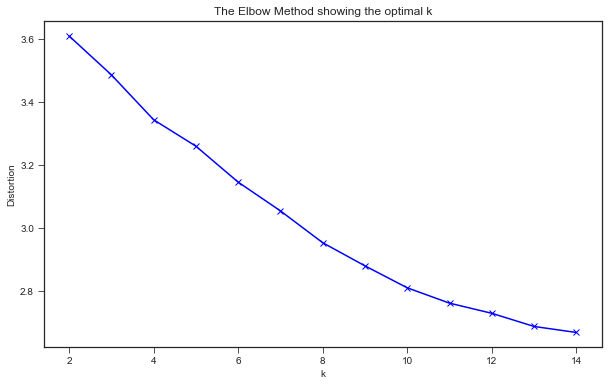

In [28]:
apply_elbow_method(X_train_scaled)

#### 4 кластера

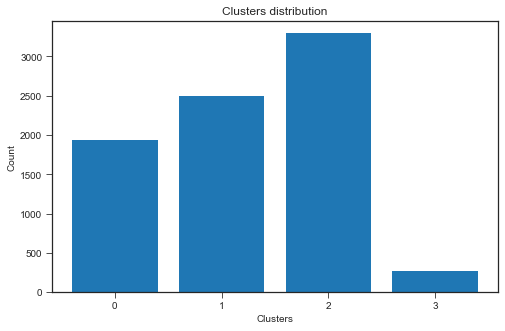

In [29]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_clast_4 = kmeans_4.fit_predict(X_train_scaled)
labels_clast_4 = pd.Series(labels_clast_4, name='clusters_4')

unique, counts = np.unique(labels_clast_4, return_counts=True)
display_clusters_distribution(unique, counts)

In [30]:
labels_clast_4.shape

(7995,)

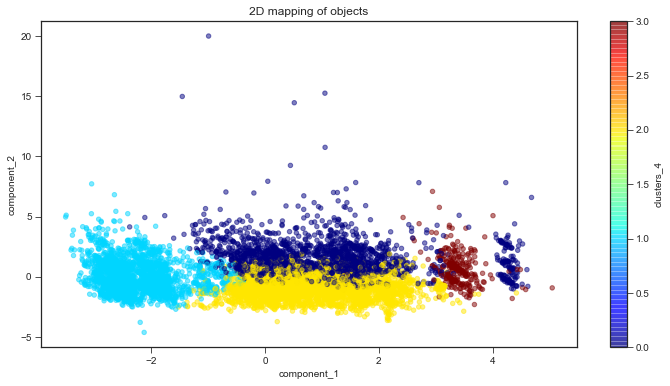

In [31]:
display_components_in_2D_space(components_2d_pca, labels_clast_4)

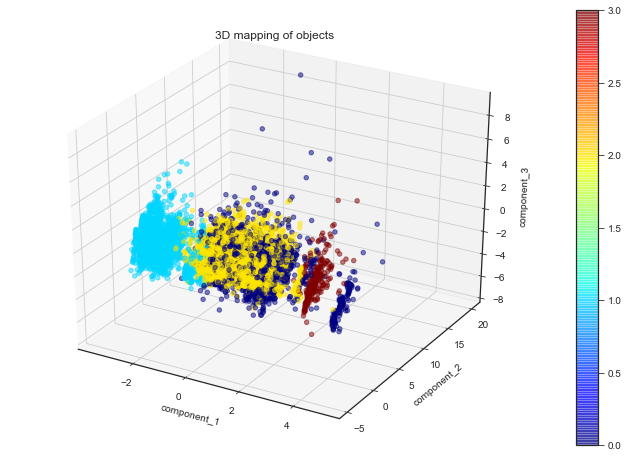

In [32]:
display_components_in_3D_space(components_3d_pca, labels_clast_4)

### Добавление новых признаков

In [33]:
clusters_4_dummies = pd.get_dummies(labels_clast_4, drop_first=False, prefix='clusters_4')

X_train_ext = pd.concat([X_train_scaled.reset_index(), 
                    clusters_4_dummies], axis=1)

X_train_ext.set_index('Id', inplace=True)

X_train_ext.shape

(7995, 22)

In [34]:
y_train_ext = pd.concat([y_train.reset_index(), 
                    clusters_4_dummies], axis=1)
y_train_ext.set_index('Id', inplace=True)

y_train_ext.shape

(7995, 5)

In [35]:
labels_clast_4_test = kmeans_4.predict(X_test_scaled)

clusters_4_dummies = pd.get_dummies(labels_clast_4_test, drop_first=False, prefix='clusters_4')

X_test_ext = pd.concat([X_test_scaled.reset_index(), 
                    clusters_4_dummies], axis=1)
X_test_ext.set_index('Id', inplace=True)

X_test_ext.shape

(1999, 22)

In [36]:
y_test_ext = pd.concat([y_test.reset_index(), 
                    clusters_4_dummies], axis=1)
y_test_ext.set_index('Id', inplace=True)

y_test_ext.shape

(1999, 5)

### Попробуем обучить кластеры отдельно

In [37]:
X_train_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7995 entries, 6735 to 1955
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DistrictId           7995 non-null   float64
 1   Rooms                7995 non-null   float64
 2   Square               7995 non-null   float64
 3   LifeSquare           7995 non-null   float64
 4   KitchenSquare        7995 non-null   float64
 5   Floor                7995 non-null   float64
 6   HouseFloor           7995 non-null   float64
 7   HouseYear            7995 non-null   float64
 8   Ecology_1            7995 non-null   float64
 9   Ecology_2            7995 non-null   float64
 10  Ecology_3            7995 non-null   float64
 11  Social_1             7995 non-null   float64
 12  Social_2             7995 non-null   float64
 13  Social_3             7995 non-null   float64
 14  Helthcare_2          7995 non-null   float64
 15  Shops_1              7995 non-null 

#### Модель. Кластер 0

In [38]:
X_train_0 = X_train_ext.loc[X_train_ext['clusters_4_0'] == 1].copy()
y_train_0 = y_train_ext.loc[y_train_ext['clusters_4_0'] == 1].copy()['Price']

X_train_0.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_test_0 = X_test_ext.loc[X_test_ext['clusters_4_0'] == 1].copy()
y_test_0 = y_test_ext.loc[y_test_ext['clusters_4_0'] == 1].copy()['Price']

X_test_0.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_train_0.shape, y_train_0.shape, X_test_0.shape, y_test_0.shape

((1931, 18), (1931,), (543, 18), (543,))

In [39]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [40]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_0, y_train_0)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
y_train_preds_0 = gbr.predict(X_train_0)
y_test_preds_0 = gbr.predict(X_test_0)

Train:	R2 = 0.93	MAE = 19104.83
Test:	R2 = 0.578	MAE = 45718.979


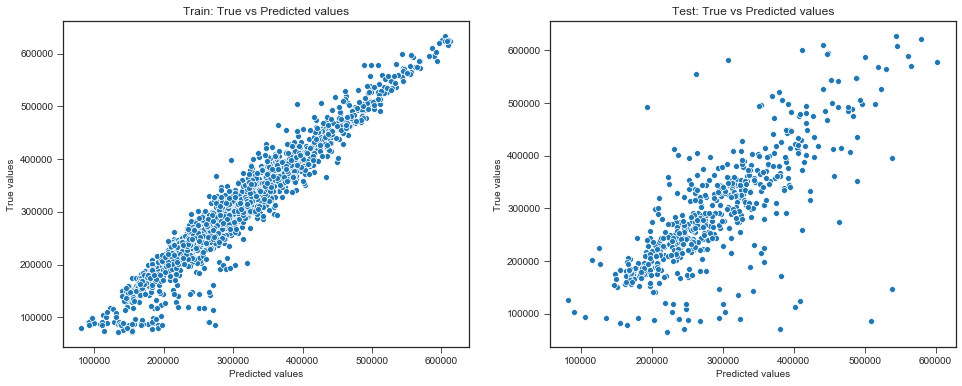

In [42]:
evaluate_preds(y_train_0, y_train_preds_0, y_test_0, y_test_preds_0)

In [44]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_0, y_train_0)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Train:	R2 = 0.938	MAE = 17157.73
Test:	R2 = 0.548	MAE = 48880.153


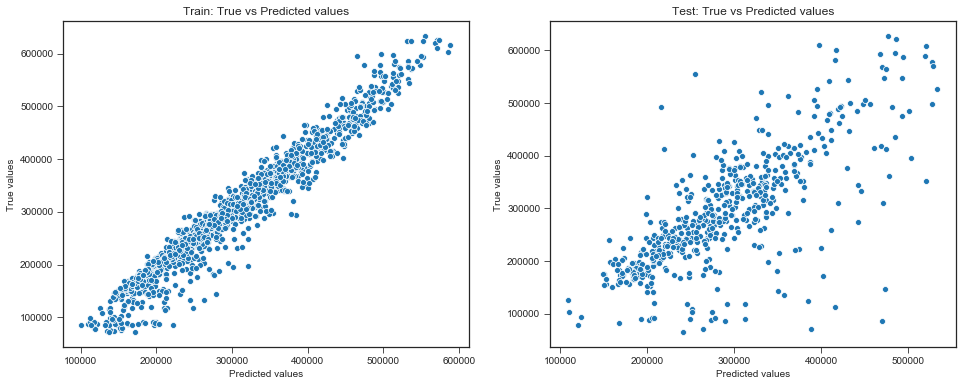

In [45]:
y_train_preds_0 = rf_model.predict(X_train_0)
y_test_preds_0 = rf_model.predict(X_test_0)

evaluate_preds(y_train_0, y_train_preds_0, y_test_0, y_test_preds_0)

#### Модель. Кластер 1

In [46]:
X_train_1 = X_train_ext.loc[X_train_ext['clusters_4_1'] == 1].copy()
y_train_1 = y_train_ext.loc[y_train_ext['clusters_4_1'] == 1].copy()['Price']

X_train_1.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_test_1 = X_test_ext.loc[X_test_ext['clusters_4_1'] == 1].copy()
y_test_1 = y_test_ext.loc[y_test_ext['clusters_4_1'] == 1].copy()['Price']

X_test_1.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((2499, 18), (2499,), (613, 18), (613,))

In [47]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [48]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_1, y_train_1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
y_train_preds_1 = gbr.predict(X_train_1)
y_test_preds_1 = gbr.predict(X_test_1)

Train:	R2 = 0.953	MAE = 8585.682
Test:	R2 = 0.752	MAE = 17181.356


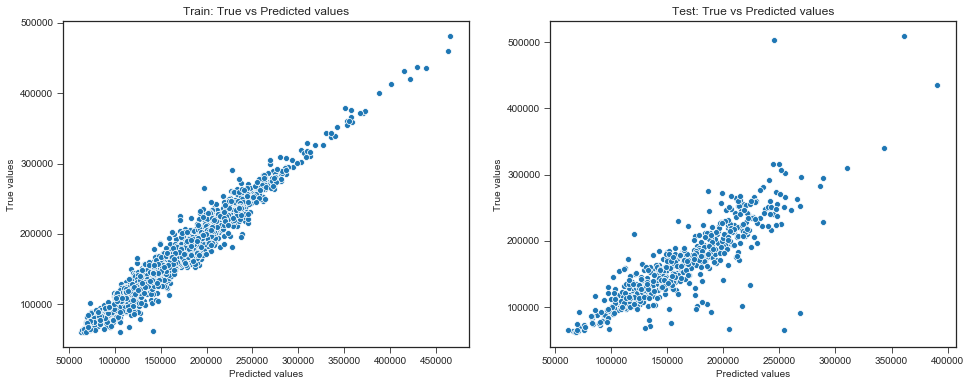

In [50]:
evaluate_preds(y_train_1, y_train_preds_1, y_test_1, y_test_preds_1)

In [51]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_1, y_train_1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Train:	R2 = 0.961	MAE = 6328.791
Test:	R2 = 0.76	MAE = 16660.229


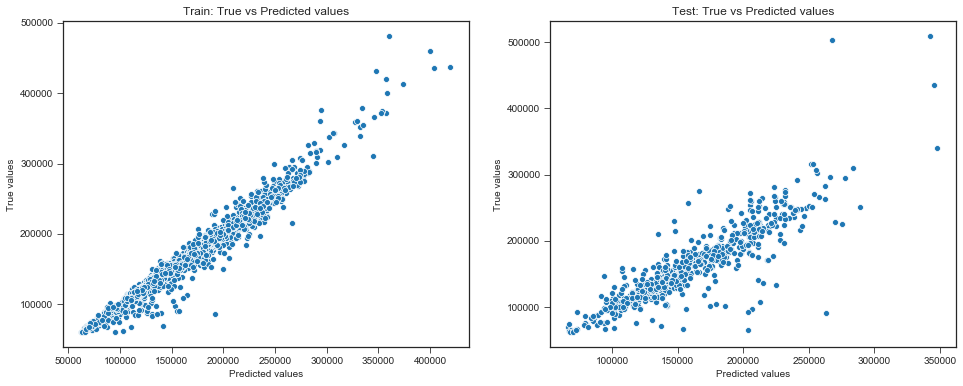

In [52]:
y_train_preds_1 = rf_model.predict(X_train_1)
y_test_preds_1 = rf_model.predict(X_test_1)

evaluate_preds(y_train_1, y_train_preds_1, y_test_1, y_test_preds_1)

#### Модель. Кластер 2

In [55]:
X_train_2 = X_train_ext.loc[X_train_ext['clusters_4_2'] == 1].copy()
y_train_2 = y_train_ext.loc[y_train_ext['clusters_4_2'] == 1].copy()['Price']

X_train_2.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_test_2 = X_test_ext.loc[X_test_ext['clusters_4_2'] == 1].copy()
y_test_2 = y_test_ext.loc[y_test_ext['clusters_4_2'] == 1].copy()['Price']

X_test_2.drop(['clusters_4_0', 'clusters_4_1', 'clusters_4_2', 'clusters_4_3'], axis=1, inplace=True)

X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((3291, 18), (3291,), (770, 18), (770,))

In [56]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [57]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_2, y_train_2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
y_train_preds_2 = gbr.predict(X_train_2)
y_test_preds_2 = gbr.predict(X_test_2)

Train:	R2 = 0.927	MAE = 13035.386
Test:	R2 = 0.591	MAE = 25554.625


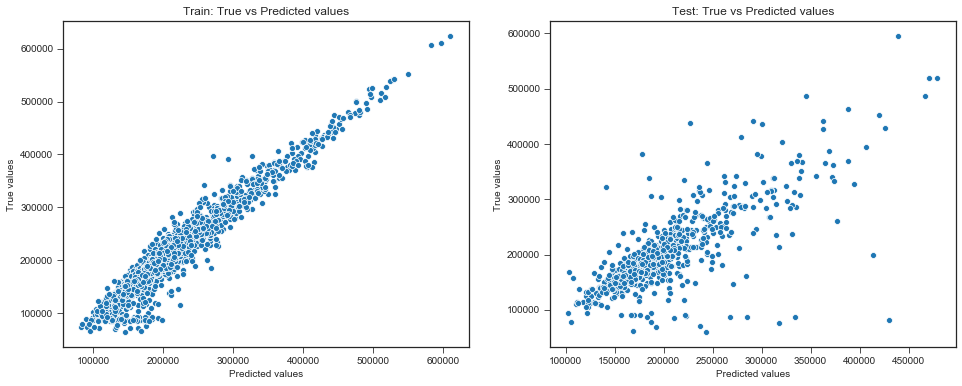

In [59]:
evaluate_preds(y_train_2, y_train_preds_2, y_test_2, y_test_preds_2)

In [60]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Train:	R2 = 0.95	MAE = 9462.089
Test:	R2 = 0.599	MAE = 25970.068


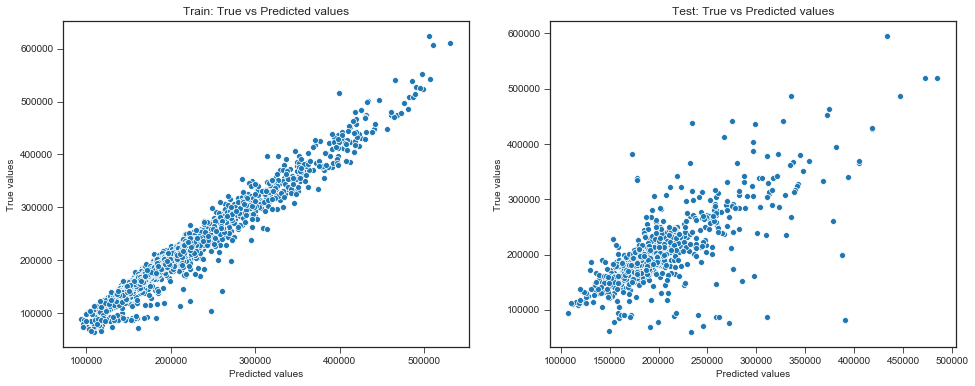

In [61]:
y_train_preds_2 = rf_model.predict(X_train_2)
y_test_preds_2 = rf_model.predict(X_test_2)

evaluate_preds(y_train_2, y_train_preds_2, y_test_2, y_test_preds_2)